In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv("D:/DL_data/all/train.csv")
test_data = pd.read_csv("D:/DL_data/all/test.csv")
train_data  =  train_data.append(test_data,sort=False,ignore_index = True)

In [5]:
train_data = train_data.drop(columns = ['Ticket','Cabin'])

In [8]:
import re

In [10]:
train_data['Title'] = train_data.Name.apply(lambda x : re.search('([A-Z][a-z]+)\.',x).group(1))

train_data.Title.head(20)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
Name: Title, dtype: object

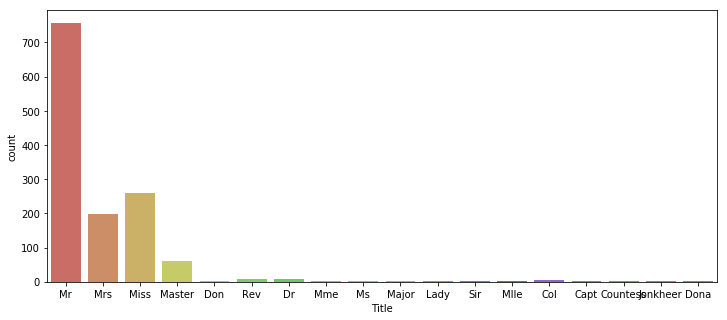

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x = "Title",data=train_data,palette="hls")
plt.show()

In [12]:

test_data['Title'] = test_data.Name.apply(lambda x : re.search('([A-Z][a-z]+)\.',x).group(1))
change_dict = {
   "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
}
train_data.Title = train_data.Title.map(change_dict)
test_data.Title = test_data.Title.map(change_dict)

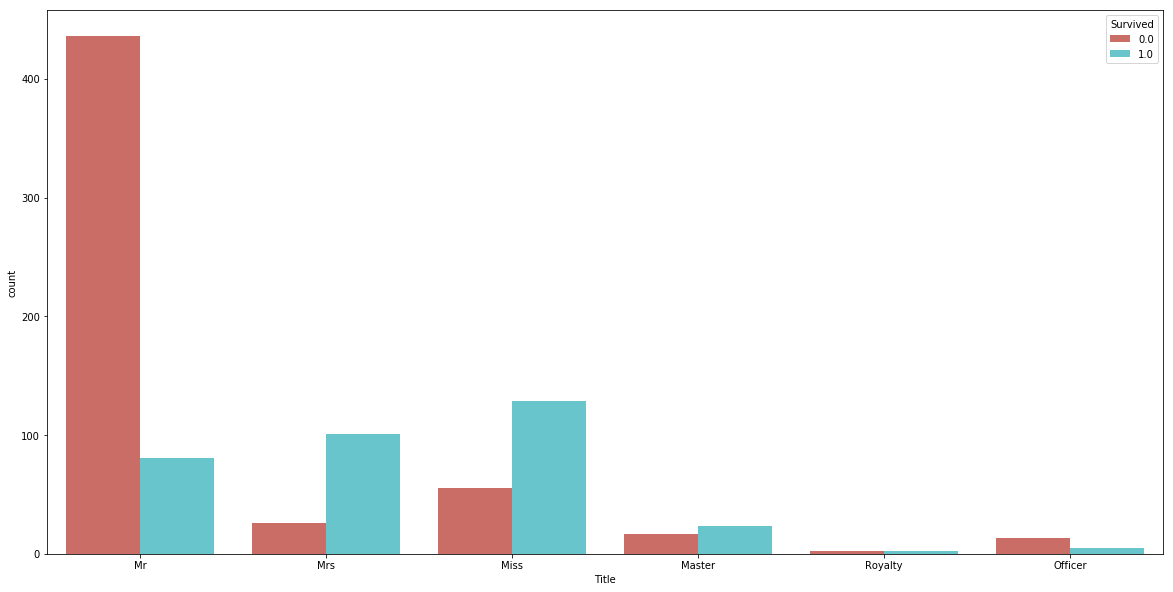

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x = "Title",
             data = train_data,
            palette="hls",
             hue = "Survived")
plt.show()

In [14]:
ageca = train_data.groupby(['Sex','Pclass','Title']).Age

In [15]:
ageca.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    43.5
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

In [17]:
train_data.loc[train_data.Age.isnull(),'Age'] = train_data.groupby(['Sex','Pclass','Title']).Age.transform('median')

In [20]:
interval = (0,5,12,18,25,35,60,130)
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']
train_data['Age_cat'] = pd.cut(train_data.Age,interval,labels=cats)
train_data.Age_cat.head(10)

0    Student
1      Adult
2      Young
3      Young
4      Young
5      Young
6      Adult
7     babies
8      Young
9       Teen
Name: Age_cat, dtype: category
Categories (7, object): [babies < Children < Teen < Student < Young < Adult < Senior]

In [21]:
def im(a ,b ):
    plt.figure(figsize=(20,10))
    sns.countplot(a,data = train_data,hue = b,palette="hls")
    plt.show()

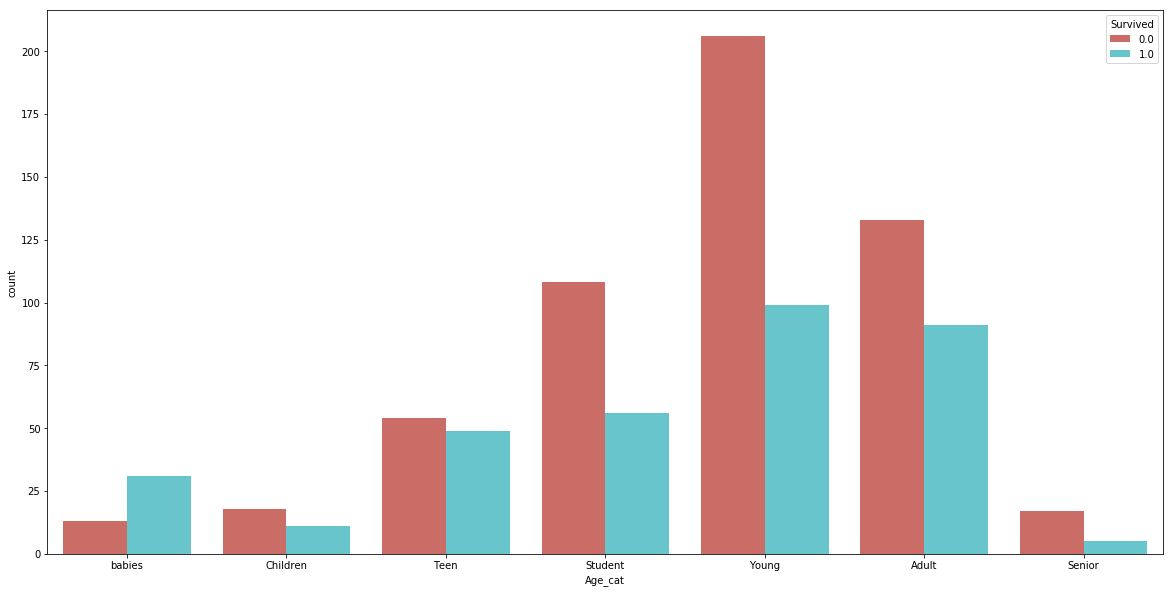

In [22]:
im(a= train_data.Age_cat,b = train_data.Survived)

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,Student
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,Young
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,Young
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,Young


In [24]:
del train_data["Name"]

In [25]:
train_data.drop(columns=["Age","PassengerId"])

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_cat
0,0.0,3,male,1,0,7.2500,S,Mr,Student
1,1.0,1,female,1,0,71.2833,C,Mrs,Adult
2,1.0,3,female,0,0,7.9250,S,Miss,Young
3,1.0,1,female,1,0,53.1000,S,Mrs,Young
4,0.0,3,male,0,0,8.0500,S,Mr,Young
5,0.0,3,male,0,0,8.4583,Q,Mr,Young
6,0.0,1,male,0,0,51.8625,S,Mr,Adult
7,0.0,3,male,3,1,21.0750,S,Master,babies
8,1.0,3,female,0,2,11.1333,S,Mrs,Young
9,1.0,2,female,1,0,30.0708,C,Mrs,Teen


In [26]:
train_data['Family'] = train_data['Parch']+train_data['SibSp']

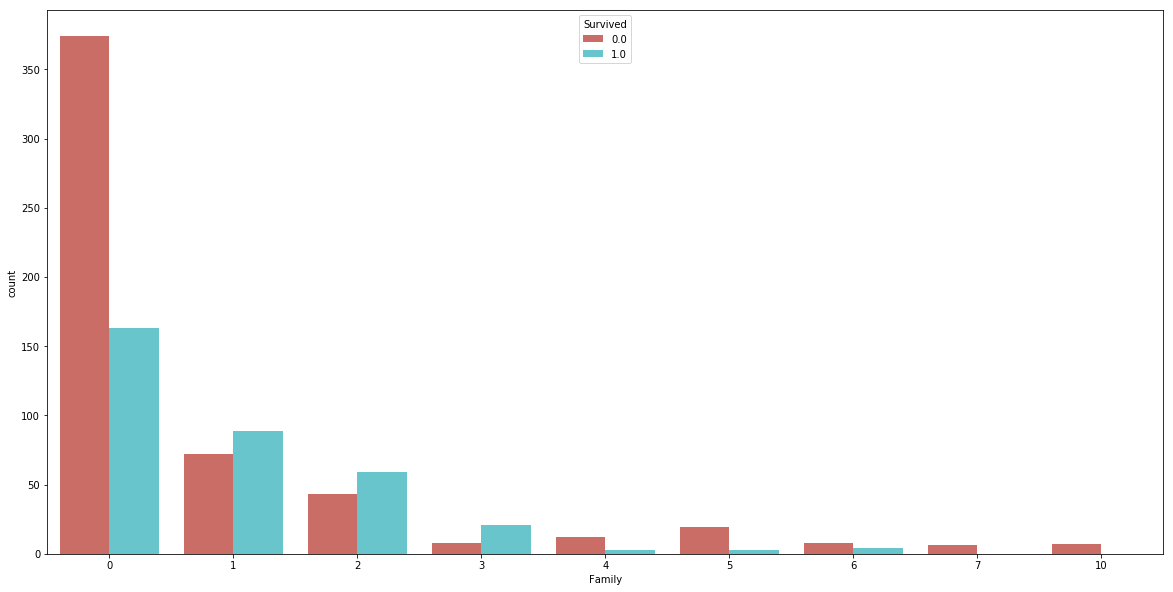

In [27]:
im(train_data.Family,train_data.Survived)

In [28]:
train_data.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [29]:
interval2 = (-1,8,16,32,520)
label = ['B','A','S','SSS']
train_data['test'] = pd.cut(train_data.Fare,interval2,labels=label)

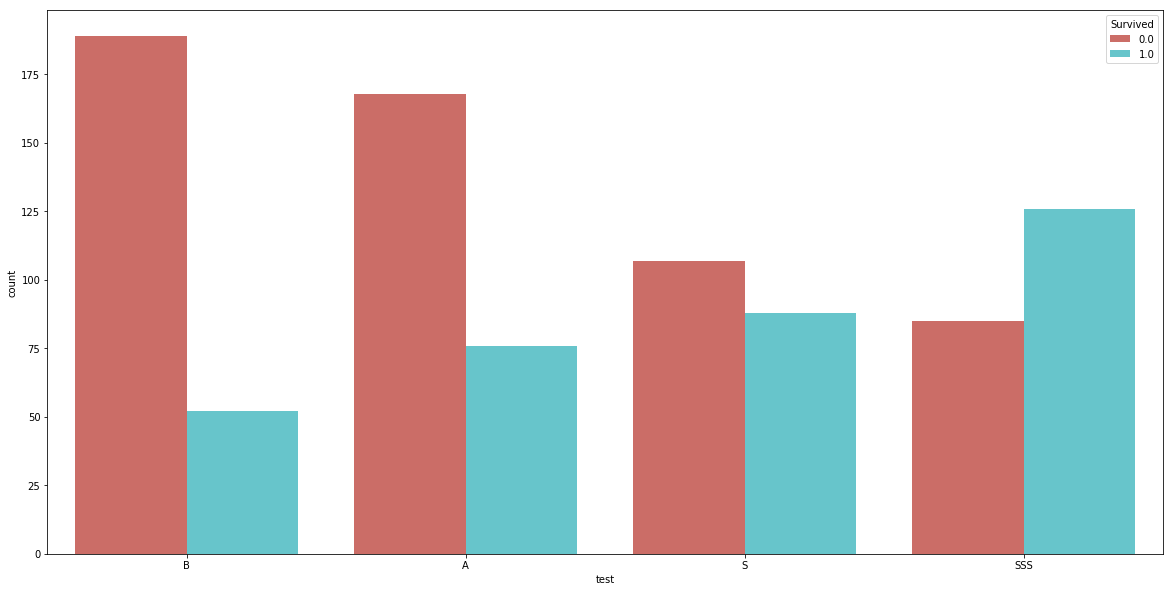

In [30]:
im(train_data.test,train_data.Survived)

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_cat,Family,test
0,1,0.0,3,male,22.0,1,0,7.2500,S,Mr,Student,1,B
1,2,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Adult,1,SSS
2,3,1.0,3,female,26.0,0,0,7.9250,S,Miss,Young,0,B
3,4,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Young,1,SSS
4,5,0.0,3,male,35.0,0,0,8.0500,S,Mr,Young,0,A


In [32]:
train_data.drop(columns=['SibSp','Parch'])

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_cat,Family,test
0,1,0.0,3,male,22.0,7.2500,S,Mr,Student,1,B
1,2,1.0,1,female,38.0,71.2833,C,Mrs,Adult,1,SSS
2,3,1.0,3,female,26.0,7.9250,S,Miss,Young,0,B
3,4,1.0,1,female,35.0,53.1000,S,Mrs,Young,1,SSS
4,5,0.0,3,male,35.0,8.0500,S,Mr,Young,0,A
5,6,0.0,3,male,26.0,8.4583,Q,Mr,Young,0,A
6,7,0.0,1,male,54.0,51.8625,S,Mr,Adult,0,SSS
7,8,0.0,3,male,2.0,21.0750,S,Master,babies,4,S
8,9,1.0,3,female,27.0,11.1333,S,Mrs,Young,2,A
9,10,1.0,2,female,14.0,30.0708,C,Mrs,Teen,1,S


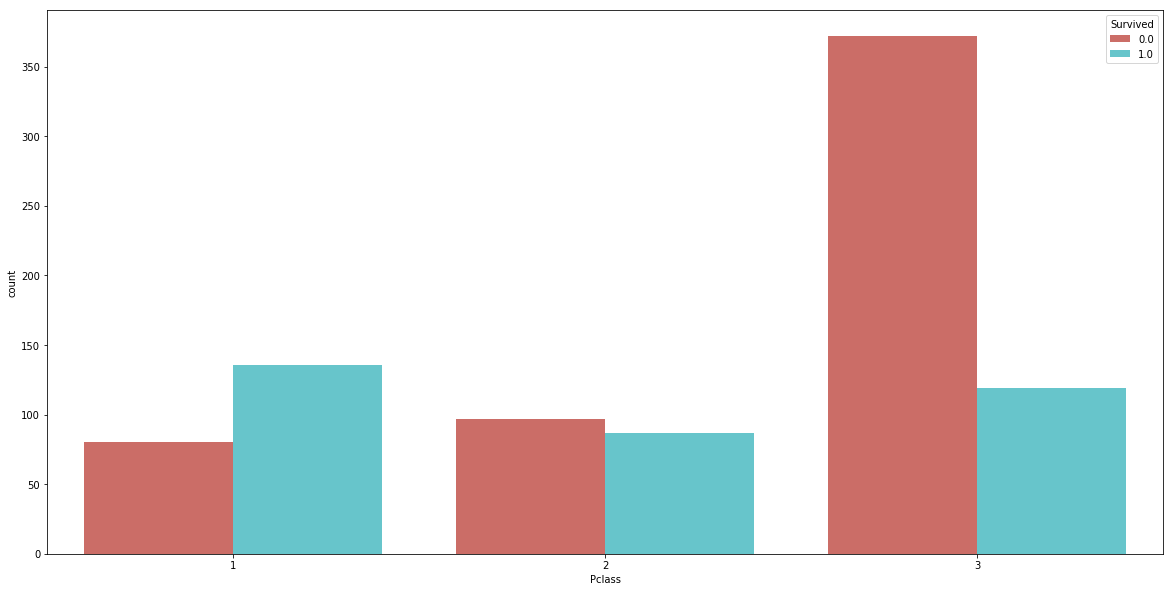

In [33]:
im(train_data.Pclass,train_data.Survived)

In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age_cat,Family,test
0,1,0.0,3,male,22.0,1,0,7.2500,S,Mr,Student,1,B
1,2,1.0,1,female,38.0,1,0,71.2833,C,Mrs,Adult,1,SSS
2,3,1.0,3,female,26.0,0,0,7.9250,S,Miss,Young,0,B
3,4,1.0,1,female,35.0,1,0,53.1000,S,Mrs,Young,1,SSS
4,5,0.0,3,male,35.0,0,0,8.0500,S,Mr,Young,0,A


In [35]:
del train_data['PassengerId']

In [36]:
train_data.drop(columns=['SibSp','Parch'],inplace=True)

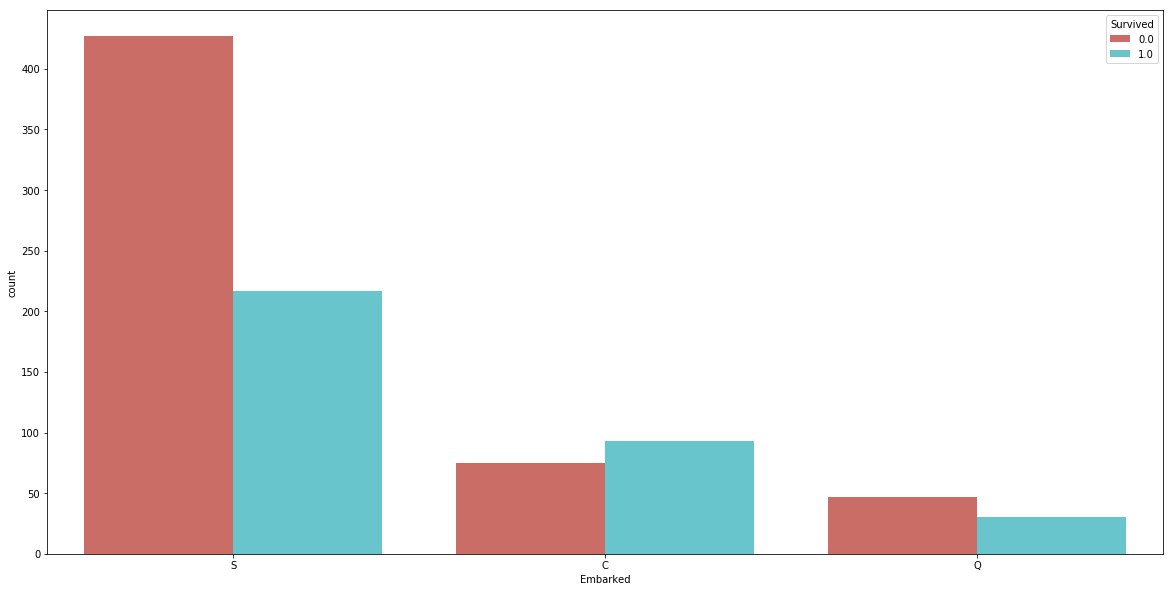

In [37]:
im(train_data.Embarked,train_data.Survived)

In [38]:
train_data= train_data.rename(columns={'test':'Test'})

In [39]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age_cat,Family,Test
0,0.0,3,male,22.0,7.2500,S,Mr,Student,1,B
1,1.0,1,female,38.0,71.2833,C,Mrs,Adult,1,SSS
2,1.0,3,female,26.0,7.9250,S,Miss,Young,0,B
3,1.0,1,female,35.0,53.1000,S,Mrs,Young,1,SSS
4,0.0,3,male,35.0,8.0500,S,Mr,Young,0,A


In [40]:
del train_data["Fare"]

In [41]:
x_train = 

,Survived,Pclass,Sex,Age,Embarked,Title,Age_cat,Family,Test
0,0.0,3,male,22.0,S,Mr,Student,1,B
1,1.0,1,female,38.0,C,Mrs,Adult,1,SSS
2,1.0,3,female,26.0,S,Miss,Young,0,B
3,1.0,1,female,35.0,S,Mrs,Young,1,SSS
4,0.0,3,male,35.0,S,Mr,Young,0,A
5,0.0,3,male,26.0,Q,Mr,Young,0,A
6,0.0,1,male,54.0,S,Mr,Adult,0,SSS
7,0.0,3,male,2.0,S,Master,babies,4,S
8,1.0,3,female,27.0,S,Mrs,Young,2,A
9,1.0,2,female,14.0,C,Mrs,Teen,1,S


In [78]:
train_data = pd.get_dummies(train_data,
                            columns=['Sex','Embarked','Title','Age_cat','Test'],
                            prefix=['Sex','Emb','Title','Age','Fare'],
                           drop_first=True)

In [84]:
train_data.shape

(1309, 21)

In [85]:
y_train = train_data[0:890]['Survived'].values

In [86]:
x_train = train_data[0:890].drop(['Survived'],axis=1).values

In [87]:
x_test = train_data[891:].drop(['Survived'],axis=1).values
x_test = x_test.astype(np.float64,copy=False)

In [82]:
from sklearn.preprocessing import LabelEncoder
sc = LabelEncoder()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

ValueError: bad input shape (890, 20)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [89]:
X_test

NameError: name 'X_test' is not defined

In [92]:
model = Sequential()


model.add(Dense(18, 
                activation='relu',  
                input_dim=20,
                kernel_initializer='uniform'))
#The argument being passed to each Dense layer (18) is the number of hidden units of the layer. 
# A hidden unit is a dimension in the representation space of the layer.

#Stacks of Dense layers with relu activations can solve a wide range of problems
#(including sentiment classification), and you’ll likely use them frequently.

# Adding an Dropout layer to previne from overfitting
model.add(Dropout(0.50))

#adding second hidden layer 
model.add(Dense(12,
                kernel_initializer='uniform',
                activation='relu'))

# Adding another Dropout layer
model.add(Dropout(0.50))

# adding the output layer that is binary [0,1]
model.add(Dense(1,
                kernel_initializer='uniform',
                activation='sigmoid'))
#With such a scalar sigmoid output on a binary classification problem, the loss
#function you should use is binary_crossentropy

#Visualizing the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 18)                378       
_________________________________________________________________
dropout_4 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 12)                228       
_________________________________________________________________
dropout_5 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 13        
Total params: 619
Trainable params: 619
Non-trainable params: 0
_________________________________________________________________


In [94]:
# model = Sequential()
# model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
# model.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))
# model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
890/890 [==============================] - 1s 632us/step - loss: 0.5083 - acc: 0.8101
Epoch 2/200
890/890 [==============================] - 0s 37us/step - loss: 0.5015 - acc: 0.7809
Epoch 3/200
890/890 [==============================] - 0s 34us/step - loss: 0.4819 - acc: 0.7989
Epoch 4/200
890/890 [==============================] - 0s 36us/step - loss: 0.4881 - acc: 0.8034
Epoch 5/200
890/890 [==============================] - 0s 38us/step - loss: 0.4673 - acc: 0.7978
Epoch 6/200
890/890 [==============================] - 0s 33us/step - loss: 0.4631 - acc: 0.8169
Epoch 7/200
890/890 [==============================] - 0s 31us/step - loss: 0.4927 - acc: 0.7966
Epoch 8/200
890/890 [==============================] - 0s 35us/step - loss: 0.4844 - acc: 0.8112
Epoch 9/200
890/890 [==============================] - 0s 37us/step - loss: 0.4711 - acc: 0.8045
Epoch 10/200
890/890 [==============================] - 0s 36us/step - loss: 0.4879 - acc: 0.7966
Epoch 11/200
890/890 [======

890/890 [==============================] - 0s 31us/step - loss: 0.4676 - acc: 0.8146
Epoch 168/200
890/890 [==============================] - 0s 36us/step - loss: 0.4850 - acc: 0.8000
Epoch 169/200
890/890 [==============================] - 0s 34us/step - loss: 0.4704 - acc: 0.8101
Epoch 170/200
890/890 [==============================] - 0s 40us/step - loss: 0.4430 - acc: 0.8281
Epoch 171/200
890/890 [==============================] - 0s 37us/step - loss: 0.4892 - acc: 0.7955
Epoch 172/200
890/890 [==============================] - 0s 40us/step - loss: 0.4754 - acc: 0.8034
Epoch 173/200
890/890 [==============================] - 0s 30us/step - loss: 0.4645 - acc: 0.8213
Epoch 174/200
890/890 [==============================] - 0s 31us/step - loss: 0.4828 - acc: 0.8213
Epoch 175/200
890/890 [==============================] - 0s 31us/step - loss: 0.4672 - acc: 0.8124
Epoch 176/200
890/890 [==============================] - 0s 31us/step - loss: 0.4584 - acc: 0.8124
Epoch 177/200
890/890 [=

In [95]:
model.evaluate(x_train,y_train,batch_size=30)

890/890 [==============================] - 0s 207us/step


[0.420302257946368, 0.8438202176201209]

In [96]:
y_predict = model.predict(x_test)


In [100]:
y_predict

array([[5.30412346e-02],
       [4.91999209e-01],
       [2.73167621e-02],
       [1.00658692e-01],
       [5.77467263e-01],
       [1.08901076e-01],
       [7.04326749e-01],
       [1.45225197e-01],
       [7.45975256e-01],
       [8.31236169e-02],
       [8.11475143e-02],
       [2.81616539e-01],
       [7.45377123e-01],
       [3.88613716e-02],
       [7.45377123e-01],
       [7.45377123e-01],
       [1.34522825e-01],
       [9.09006223e-02],
       [5.33849716e-01],
       [6.48448527e-01],
       [2.46990114e-01],
       [6.49599493e-01],
       [7.45377123e-01],
       [4.13210481e-01],
       [6.86066568e-01],
       [2.23824661e-02],
       [7.45377123e-01],
       [8.71468037e-02],
       [3.13772947e-01],
       [1.02276333e-01],
       [9.97041911e-02],
       [1.40814126e-01],
       [5.78285217e-01],
       [5.88611484e-01],
       [4.86016184e-01],
       [9.74811092e-02],
       [5.15381217e-01],
       [5.20814061e-01],
       [5.47839962e-02],
       [2.94645101e-01],


In [101]:
y_final = (y_predict > 0.5).astype(int).reshape(x_test.shape[0])

In [102]:
y_final

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [105]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_final})
output.to_csv('prediction-ann.csv', index=False)

In [106]:
pwd

'C:\\Users\\11503'